Gender of voice detection is a classical example in machine learning.

The human ear can easily identify a person’s gender within the first few spoken words, but it is tricky to design a computer program that can detect the gender

The goal of this project is to implement multiple models using python to determine a person’s gender as male or female based on a sample of their voices 


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import linear_model, preprocessing

The dataset was built using thousands of samples using male and female voices.
Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis
The pre-processed  .WAV files were save into a CSV file (20 columns for each feature and one label column)

In [2]:

df = pd.read_csv('https://raw.githubusercontent.com/primaryobjects/voice-gender/master/voice.csv')

Check if there is any missing value

In [3]:
df.isnull().values.any()

False

In [4]:
df.head(6)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male


Scale X and convert labels into values

In [5]:
from sklearn.utils import shuffle
df1 = shuffle(df)

xnames = df1.columns[:-1]
X = np.array(df1[xnames].values)
Xs = preprocessing.scale(X)
ystr = df1['label'].values
vals, y = np.unique(ystr, return_inverse=True)

Split the data into training set and testing set

In [6]:
ntr = len(y)//2
Xtr = Xs[:ntr,:]
ytr = y[:ntr]
Xts = Xs[ntr:,:]
yts = y[ntr:]

Logistic Regression Model

In [7]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(Xtr,ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
yts_hat = logreg.predict(Xts)
Acc_log_model = np.mean(yts==yts_hat)
print(Acc_log_model)

0.974747474747


<Container object of 3 artists>

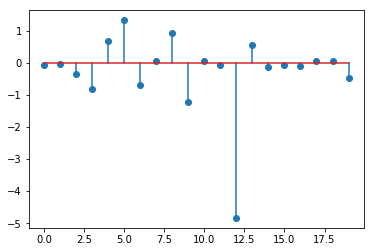

In [9]:
W = logreg.coef_
W = W.ravel()
plt.stem(W)

Find two most significant features among the 20 features

In [10]:
ind = np.argsort(np.abs(W))
i1 = ind[-1]
i2 = ind[-2]
name1 = xnames[i1]
name2 = xnames[i2]
print('The two most significant properties are {0:s} and {1:s}'.format(name1,name2))

The two most significant properties are meanfun and IQR


Use SVC model to compute accuracy

In [11]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() 
svc.fit(Xtr,ytr)
y_pred1=svc.predict(Xts)
print(metrics.accuracy_score(yts,y_pred1))

0.977904040404


Use KNeighborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(Xtr, ytr)
y_pred2 = clf.predict(Xts)
print (metrics.accuracy_score(yts, y_pred2))

0.96654040404


Use random forest classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()
rand_forest.fit(Xtr, ytr)
y_pred3 = rand_forest.predict(Xts)
print(metrics.accuracy_score(yts,y_pred3))

0.977272727273
